In [1]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline
pd.set_option('display.max_rows',150)

# setting up plot style 
style.use('seaborn-poster')
style.use('fivethirtyeight')
pd.set_option('display.max_rows', 500)

In [2]:
#Importing the dataset
df=pd.read_csv('train (1).csv')
df.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
#Determining shape of Data
df.shape

(1460, 81)

In [4]:
#Checking for data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Describing the data
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [6]:
#Checking for Null Values
# percentage of missing values in each column
round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Id                0.00
Functional        0.00
Fireplaces        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

CONCLUSION 1:
1. The dataset given in not big enough and can be easily worked on a local system
2. There are more categorical columns present as compared to continuous columns in the dataset
3. Some columns have large missing values because of which they have to be dropped
4. Some categorical columns with missing data can be imputed with mode, and continuous columns with mean

In [7]:
#Dropping Columns with large number of missing values
df=df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)


In [8]:
#Check if the columns are removed
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [9]:
#Checking the Datatype for columns
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [10]:
#Imputing missing value with mean
mean_value=df['LotFrontage'].mean()
df['LotFrontage'].fillna(value=mean_value, inplace=True)

In [11]:
##Imputing missing value with mode
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])

In [12]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [13]:
df=df.dropna()

In [14]:
#Creating Dummy columns for categorical variables
df_new = pd.get_dummies(data=df, columns=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond'],drop_first=True)
df_new.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... GarageFinish_RFn GarageFinish_Unf GarageQual_Fa  \
0    AllPub    Inside  ...                1                0             0   
1    AllPub       FR2  ...                1                0             0   
2    AllPub    Inside  ...                1                0             0   
3    AllPub    Corner  ...                0                1             0   
4    AllPub       FR2  ...                1                0             0   

  GarageQual_Gd GarageQual_Po GarageQual_TA  GarageCond_Fa  GarageCond_Gd  \
0             0             0             1              0              0   
1             0             0             1              0              0   
2             0             0             1              0              0   
3             0             0             1              0              0   
4             0             0             1              0              0   

   GarageCond_Po  GarageCond_TA  
0              0              1  
1              0              1  
2              0              1  
3              0              1  
4              0              1  

[5 rows x 104 columns]

In [15]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [16]:
#Creating dummy columns for categorical variables
df_new1 = pd.get_dummies(data=df_new, columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
                                          'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
                                          'Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','Heating',
                                          'HeatingQC','CentralAir','KitchenQual','Functional','PavedDrive','SaleCondition','SaleType'],drop_first=True)
                                                   

In [17]:
df_new1.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleCondition_Normal  \
0          2003       196.0         706  ...                     1   
1          1976         0.0         978  ...                     1   
2          2002       162.0         486  ...                     1   
3          1970         0.0         216  ...                     0   
4          2000       350.0         655  ...                     1   

   SaleCondition_Partial  SaleType_CWD  SaleType_Con  SaleType_ConLD  \
0                      0             0             0               0   
1                      0             0             0               0   
2                      0             0             0               0   
3                      0             0             0               0   
4                      0             0             0               0   

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  
0               0               0             0             0            1  
1               0               0             0             0            1  
2               0               0             0             0            1  
3               0               0             0             0            1  
4               0               0             0             0            1  

[5 rows x 234 columns]

In [18]:
df_new1.isnull().sum()

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
MiscVal                  0
MoSold                   0
YrSold                   0
S

In [32]:
df_new1.dtypes

Id                         int64
MSSubClass                 int64
LotFrontage              float64
LotArea                    int64
OverallQual                int64
OverallCond                int64
YearBuilt                  int64
YearRemodAdd               int64
MasVnrArea               float64
BsmtFinSF1                 int64
BsmtFinSF2                 int64
BsmtUnfSF                  int64
TotalBsmtSF                int64
1stFlrSF                   int64
2ndFlrSF                   int64
LowQualFinSF               int64
GrLivArea                  int64
BsmtFullBath               int64
BsmtHalfBath               int64
FullBath                   int64
HalfBath                   int64
BedroomAbvGr               int64
KitchenAbvGr               int64
TotRmsAbvGrd               int64
Fireplaces                 int64
GarageYrBlt              float64
GarageCars                 int64
GarageArea                 int64
WoodDeckSF                 int64
OpenPorchSF                int64
EnclosedPo

In [19]:
#Checking for correlation among variables
df_new1.corr()

Id  MSSubClass  LotFrontage   LotArea  \
Id                     1.000000    0.011687    -0.011041 -0.032844   
MSSubClass             0.011687    1.000000    -0.355296 -0.138054   
LotFrontage           -0.011041   -0.355296     1.000000  0.306908   
LotArea               -0.032844   -0.138054     0.306908  1.000000   
OverallQual           -0.032883    0.034491     0.232568  0.106324   
OverallCond            0.013029   -0.061330    -0.052545 -0.002269   
YearBuilt             -0.015129    0.028397     0.117365  0.015639   
YearRemodAdd          -0.024224    0.041047     0.082377  0.015126   
MasVnrArea            -0.050298    0.022936     0.179700  0.104160   
BsmtFinSF1            -0.007242   -0.069575     0.217042  0.213063   
BsmtFinSF2            -0.005516   -0.066137     0.043665  0.111686   
BsmtUnfSF             -0.008274   -0.138922     0.119928 -0.004227   
TotalBsmtSF           -0.017912   -0.236906     0.362715  0.258409   
1stFlrSF               0.008684   -0.250050     0.414893  0.295919   
2ndFlrSF               0.007333    0.308104     0.073451  0.052935   
LowQualFinSF          -0.044125    0.046413     0.037025  0.004904   
GrLivArea              0.008356    0.076930     0.368319  0.261159   
BsmtFullBath           0.001030    0.003807     0.092345  0.157702   
BsmtHalfBath          -0.019809   -0.002633    -0.006256  0.048377   
FullBath               0.005673    0.136306     0.178985  0.122457   
HalfBath               0.005652    0.176165     0.048976  0.016290   
BedroomAbvGr           0.041511   -0.021651     0.237000  0.117778   
KitchenAbvGr           0.004806    0.286572    -0.005701 -0.024697   
TotRmsAbvGrd           0.029185    0.042406     0.319760  0.187990   
Fireplaces            -0.017536   -0.044466     0.236080  0.269643   
GarageYrBlt           -0.005337    0.099553     0.038021 -0.041505   
GarageCars             0.014997   -0.039043     0.268895  0.154739   
GarageArea             0.015399   -0.098141     0.323306  0.180778   
WoodDeckSF            -0.028146   -0.012634     0.076031  0.173167   
OpenPorchSF           -0.006176   -0.005462     0.135173  0.086301   
EnclosedPorch          0.004554   -0.010571     0.010111 -0.023094   
3SsnPorch             -0.046541   -0.044049     0.062569  0.020574   
ScreenPorch            0.001769   -0.026414     0.037980  0.043511   
PoolArea               0.057268    0.008214     0.181341  0.077888   
MiscVal               -0.006114   -0.007805     0.001236  0.038226   
MoSold                 0.018962   -0.013840     0.009508  0.003203   
YrSold                 0.002776   -0.021529     0.007682 -0.012977   
SalePrice             -0.025343   -0.082813     0.333322  0.264674   
BsmtQual_Fa           -0.007929   -0.002993    -0.051401 -0.034497   
BsmtQual_Gd           -0.003803    0.166315    -0.024324  0.028065   
BsmtQual_TA            0.034572   -0.133807    -0.074665 -0.053275   
BsmtCond_Gd           -0.003290    0.002795    -0.001767  0.014000   
BsmtCond_Po           -0.030142   -0.023647    -0.008445 -0.003770   
BsmtCond_TA            0.010934   -0.010941     0.046251  0.007252   
BsmtExposure_Gd       -0.007763    0.018377     0.145911  0.279110   
BsmtExposure_Mn        0.023251    0.003497     0.032005  0.005786   
BsmtExposure_No       -0.027024   -0.057720    -0.142296 -0.174821   
BsmtFinType1_BLQ       0.030606   -0.072790    -0.003625  0.012259   
BsmtFinType1_GLQ      -0.017715    0.094679     0.082830  0.015307   
BsmtFinType1_LwQ      -0.028353   -0.006602    -0.058127 -0.021533   
BsmtFinType1_Rec       0.002218   -0.091256     0.030847  0.030564   
BsmtFinType1_Unf       0.021525    0.033609    -0.050852 -0.066313   
BsmtFinType2_BLQ      -0.043486   -0.023946     0.021031  0.057504   
BsmtFinType2_GLQ      -0.022683    0.053737    -0.049108  0.000325   
BsmtFinType2_LwQ       0.017062   -0.050600     0.011247 -0.002022   
BsmtFinType2_Rec       0.048974   -0.040007     0.031889  0.108920   
BsmtFinType2_Unf       0.004015    0.05

CONCLUSION 2:
1. Because of a lot of categorical columns, the dummy variables count has increased

# Applying RFE and Fitting Model

In [20]:
#Extracting dataset for model fitting
y_rfe=df_new1['SalePrice']
df_rfe=df_new1.drop(['SalePrice'],axis=1)
df_rfe.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleCondition_Normal  \
0          2003       196.0         706  ...                     1   
1          1976         0.0         978  ...                     1   
2          2002       162.0         486  ...                     1   
3          1970         0.0         216  ...                     0   
4          2000       350.0         655  ...                     1   

   SaleCondition_Partial  SaleType_CWD  SaleType_Con  SaleType_ConLD  \
0                      0             0             0               0   
1                      0             0             0               0   
2                      0             0             0               0   
3                      0             0             0               0   
4                      0             0             0               0   

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  
0               0               0             0             0            1  
1               0               0             0             0            1  
2               0               0             0             0            1  
3               0               0             0             0            1  
4               0               0             0             0            1  

[5 rows x 233 columns]

In [21]:
#Using SVR estimator for RFE
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=20, step=1)
selector = selector.fit(df_rfe, y_rfe)

In [22]:
selector.support_

array([False,  True,  True, False,  True,  True,  True,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [23]:
#Checking which features have been selected after RFE
selector.ranking_

array([146,   1,   1, 203,   1,   1,   1,   1,  36,  64, 165, 164,  19,
         1,   2, 106,  57,   1, 163, 147,  43,   1,   9,   1,   1,  62,
        29,  11,  28,  23,  59, 148,   7, 141, 170,  16, 118, 188,  53,
         5,  66, 153, 145,   1,  80,   1,  58,   1,  89,  45,  72,  82,
       169, 126,  74,  68, 112, 195, 194,  76, 103, 178,  48, 111, 206,
        35,   3, 167, 107, 177, 104, 133, 189, 137, 200,  60, 125,  90,
        40, 166,  79, 201,  15,  30, 159,  65, 176,  69, 102, 161,  78,
       199, 115, 214,  81,  47, 157,  32,  17,  86, 109, 171,  99,  55,
        31, 174,  26,  38,   8,  96, 128,  52,  41,  56,  42,  87, 113,
        24,  10, 160, 205,  91, 202, 151, 204, 152, 136, 173, 213, 179,
       190, 209, 142,  22,  75,  70,  73,  33, 121, 198,  85, 135,  97,
        13, 144,  12, 129, 211, 149, 191, 184, 185, 168, 131, 124, 181,
       208,  46, 180,  51,  14, 182,  61,  27, 207,  77,  54,  84, 108,
       192, 127,  92, 196,  49,  18, 212,  63, 187,  25, 122,  9

In [25]:
#Getting Column names for RFE selected features
for feature in selector.support_.nonzero():
    print(df_rfe.columns[feature])
  

Index(['MSSubClass', 'LotFrontage', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', '1stFlrSF', 'BsmtFullBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'BsmtExposure_Gd', 'BsmtExposure_No',
       'BsmtFinType1_GLQ', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock',
       'Foundation_PConc', 'KitchenQual_TA', 'Functional_Typ'],
      dtype='object')


In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

In [48]:
df_rfe1=df_new1[['MSSubClass', 'LotFrontage', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', '1stFlrSF', 'BsmtFullBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'BsmtExposure_Gd', 'BsmtExposure_No',
       'BsmtFinType1_GLQ', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock',
       'Foundation_PConc', 'KitchenQual_TA', 'Functional_Typ']]
y_rfe=df_new1['SalePrice']

In [50]:
#Splitting the data into train and test set
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(df_rfe1, y_rfe, test_size=0.33, random_state=42)

In [53]:
#Fitting Ridge Model for RFE features
from numpy import absolute
from numpy import mean
from numpy import std
# define model
model = Ridge(alpha=1.0)
model=model.fit(X_train_rfe, y_train_rfe)



In [54]:
y_pred_rfe=model.predict(X_test_rfe)
y_pred_rfe

array([197127.8456602 , 118267.43138621, 156754.47424496, 278858.09187054,
       134440.06046311, 267593.59724897, 315397.8802315 , 138889.32467533,
       130972.62547787,  98939.16206218, 149164.45225392, 146466.29584482,
       144092.57818848, 141526.05646295, 185763.98197104, 183743.89359594,
       131494.0721552 , 169082.10055252, 152458.39868128, 170915.05165818,
       229668.08599618, 199032.08860294, 255624.49390734, 182187.18760645,
       288978.81470819, 235638.71367795, 177838.93139798,  95558.88164513,
       126982.45242301, 304853.63143259, 167527.36615938, 179137.46186448,
       347366.46434877, 117999.73111471,  81971.55510869, 231680.22970098,
       105294.19242703, 403424.79781931, 176140.58882822, 173701.73371866,
       171242.90887476, 131730.99174814, 160877.64120637, 270120.83895406,
        59207.6635284 , 299679.39053292, 225978.2418587 , 106594.40624393,
       187091.00633217, 110811.86833033, 145017.90377799, 262594.74149023,
       145315.4143626 , 2

In [55]:
y_train_pred_rfe = model.predict(X_train_rfe)
y_test_pred_rfe = model.predict(X_test_rfe)
#
# Mean Squared Error
#
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train_rfe, y_train_pred_rfe),
                mean_squared_error(y_test_rfe, y_test_pred_rfe)))
#
# R-Squared
#
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train_rfe, y_train_pred_rfe), r2_score(y_test_rfe, y_test_pred_rfe)))

MSE train: 1365743784.641, test: 1287041432.614
R^2 train: 0.787, test: 0.786


# Working with all columns with no RFE

In [32]:
y_norm=df_new1['SalePrice']
df_norm=df_new1.drop(['SalePrice'],axis=1)
df_norm.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleCondition_Normal  \
0          2003       196.0         706  ...                     1   
1          1976         0.0         978  ...                     1   
2          2002       162.0         486  ...                     1   
3          1970         0.0         216  ...                     0   
4          2000       350.0         655  ...                     1   

   SaleCondition_Partial  SaleType_CWD  SaleType_Con  SaleType_ConLD  \
0                      0             0             0               0   
1                      0             0             0               0   
2                      0             0             0               0   
3                      0             0             0               0   
4                      0             0             0               0   

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  
0               0               0             0             0            1  
1               0               0             0             0            1  
2               0               0             0             0            1  
3               0               0             0             0            1  
4               0               0             0             0            1  

[5 rows x 233 columns]

In [33]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(df_norm, y_norm, test_size=0.33, random_state=42)

In [34]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
ridge_norm =  Ridge(alpha=1.0)
ridge_norm.fit(X_train_norm, y_train_norm)

Ridge()

In [37]:
y_train_pred_norm = ridge_norm.predict(X_train_norm)
y_test_pred_norm = ridge_norm.predict(X_test_norm)
#
# Mean Squared Error
#
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train_norm, y_train_pred_norm),
                mean_squared_error(y_test_norm, y_test_pred_norm)))
#
# R-Squared
#
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train_norm, y_train_pred_norm), r2_score(y_test_norm, y_test_pred_norm)))

MSE train: 548345247.630, test: 914078724.153
R^2 train: 0.914, test: 0.848


# Lasso Regression

In [39]:
from sklearn.linear_model import Lasso
#Fit Lasso regression model
lasso_norm = Lasso(alpha=0.1)

In [40]:
lasso_norm.fit(X_train_norm, y_train_norm)

C:\Users\pg21p\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.658e+11, tolerance: 6.230e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=0.1)

In [41]:
y_train_pred_norm = lasso_norm.predict(X_train_norm)
y_test_pred_norm = lasso_norm.predict(X_test_norm)
#
# Mean Squared Error
#
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train_norm, y_train_pred_norm),
                mean_squared_error(y_test_norm, y_test_pred_norm)))
#
# R-Squared
#
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train_norm, y_train_pred_norm), r2_score(y_test_norm, y_test_pred_norm)))

MSE train: 341774653.646, test: 2612864773.174
R^2 train: 0.947, test: 0.565


# Building Model With VIF eliminated Features

In [35]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = df_new1.columns
vif['VIF'] = [variance_inflation_factor(df_new1.values, i) for i in range(df_new1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\pg21p\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Features        VIF
159     Exterior1st_CBlock        inf
9               BsmtFinSF1        inf
173     Exterior2nd_CBlock        inf
16               GrLivArea        inf
15            LowQualFinSF        inf
14                2ndFlrSF        inf
13                1stFlrSF        inf
12             TotalBsmtSF        inf
11               BsmtUnfSF        inf
10              BsmtFinSF2        inf
36                  YrSold  108803.35
6                YearBuilt   61662.60
7             YearRemodAdd   33802.48
25             GarageYrBlt   25477.46
149       RoofMatl_CompShg    3995.15
75           GarageCond_TA    3177.48
71           GarageQual_TA    2370.48
200           Heating_GasA    1671.20
127        Condition2_Norm    1137.06
144        RoofStyle_Gable     743.46
194           ExterCond_TA     724.66
80             Street_Pave     407.85
78             MSZoning_RL     230.34
61       GarageType_Attchd     218.71
146          RoofStyle_Hip     188.03
167    Exterior1st_VinylSd     172.81
182    Exterior2nd_VinylSd     157.63
218         Functional_Typ     153.92
56        BsmtFinType2_Unf     140.48
4              OverallQual     115.60
23            TotRmsAbvGrd     112.99
22            KitchenAbvGr     104.99
1               MSSubClass      96.57
163    Exterior1st_MetalSd      90.26
65       GarageType_Detchd      89.16
37               SalePrice      89.00
68           GarageQual_Fa      84.10
192           ExterCond_Gd      83.47
177    Exterior2nd_MetalSd      83.10
72           GarageCond_Fa      81.05
186        MasVnrType_None      78.53
161    Exterior1st_HdBoard      71.39
5              OverallCond      71.16
175    Exterior2nd_HdBoard      61.18
168    Exterior1st_Wd Sdng      60.19
231           SaleType_New      55.14
183    Exterior2nd_Wd Sdng      53.89
225  SaleCondition_Partial      52.31
26              GarageCars      50.55
190           ExterQual_TA      49.95
43             BsmtCond_TA      46.64
21            BedroomAbvGr      46.64
27              GarageArea      44.39
233            SaleType_WD      42.53
119        Condition1_Norm      41.92
160    Exterior1st_CemntBd      41.43
185     MasVnrType_BrkFace      39.76
179    Exterior2nd_Plywood      39.63
174    Exterior2nd_CmentBd      39.41
209           CentralAir_Y      39.33
79             MSZoning_RM      38.35
153       RoofMatl_Tar&Grv      38.11
19                FullBath      37.49
86         LandContour_Lvl      34.55
164    Exterior1st_Plywood      33.77
220           PavedDrive_Y      30.29
2              LotFrontage      28.43
105     Neighborhood_NAmes      26.59
138      HouseStyle_1Story      26.06
69           GarageQual_Gd      25.69
40             BsmtQual_TA      22.88
201           Heating_GasW      22.67
60        Electrical_SBrkr      22.26
73           GarageCond_Gd      22.18
212         KitchenQual_TA      22.09
189           ExterQual_Gd      21.75
63      GarageType_BuiltIn      21.74
110   Neighborhood_OldTown      20.00
224   SaleCondition_Normal      19.07
74           GarageCond_Po      18.71
155       RoofMatl_WdShngl      18.51
136        BldgType_TwnhsE      17.76
191           ExterCond_Fa      17.54
76             MSZoning_FV      17.29
154       RoofMatl_WdShake      16.34
158    Exterior1st_BrkFace      15.56
98    Neighborhood_CollgCr      15.20
196       Foundation_PConc      14.48
211         KitchenQual_Gd      13.94
39             BsmtQual_Gd      13.31
114   Neighborhood_Somerst      13.04
187       MasVnrType_Stone      12.77
100   Neighborhood_Edwards      12.42
195      Foundation_CBlock      12.38
184    Exterior2nd_Wd Shng      11.32
141      HouseStyle_2Story      10.43
202           Heating_Grav       9.96
96    Neighborhood_BrkSide       9.92
166     Exterior1st_Stucco       9.60
112    Neighborhood_Sawyer       9.44
133        BldgType_2fmCon       9.31
181     Exterior2nd_Stucco       9.21
107    Neighborhood_NWAmes       9.16
46         BsmtExposure_No       9.08
101   Neighborhood_Gilbert  

In [42]:
df_new1=df_new1.dropna()

In [43]:
df_new1.isna().sum()

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
MiscVal                  0
MoSold                   0
YrSold                   0
S

In [57]:
df_vif=df_new1[['BsmtFinType1_GLQ','RoofMatl_Metal','BsmtFullBath','HalfBath','Neighborhood_Timber','BsmtFinType2_LwQ','Id','RoofStyle_Shed',
               'LotShape_Reg','Functional_Min1','Neighborhood_ClearCr','Neighborhood_SWISU','MSZoning_RH','Condition2_RRAe','Neighborhood_MeadowV',
               'MasVnrArea','RoofMatl_Roll','Fireplaces','Exterior2nd_ImStucc','Condition1_Feedr','Electrical_Mix','HouseStyle_SLvl','Neighborhood_BrDale',
               'GarageType_CarPort','Heating_OthW','BsmtFinType2_BLQ','HeatingQC_TA','BsmtCond_Po','BsmtCond_Gd','Neighborhood_NPkVill',
               'Neighborhood_StoneBr','LandSlope_Sev','ExterQual_Fa','Functional_Mod','GarageFinish_RFn','Condition2_PosN','Exterior1st_BrkComm',
               'KitchenQual_Fa','Exterior2nd_AsphShn','Condition2_RRNn','LandContour_Low','Foundation_Slab','HouseStyle_SFoyer','BsmtQual_Fa',
               'Condition2_PosA','LandContour_HLS','Exterior2nd_Stone','OpenPorchSF','WoodDeckSF','BsmtFinType2_GLQ','BsmtExposure_Gd',
               'Neighborhood_Veenker','Condition1_RRAn','Exterior1st_Stone','BsmtFinType1_Rec','BsmtFinType1_BLQ','Exterior1st_AsphShn',
               'HeatingQC_Fa','Functional_Maj2','Condition1_PosN','BsmtExposure_Mn','BsmtFinType1_LwQ','LandSlope_Mod','HeatingQC_Gd',
               'LotConfig_CulDSac','Electrical_FuseP','Condition2_RRAn','ExterCond_Po','EnclosedPorch','HouseStyle_2.5Unf','Condition1_RRAe',
               'PavedDrive_P','Electrical_FuseF','SaleCondition_Alloca','HouseStyle_1.5Unf','Functional_Sev','SaleType_ConLD','SaleCondition_AdjLand',
               'Condition1_RRNn','PoolArea','BsmtHalfBath','Condition1_PosA','LotShape_IR3','LotConfig_FR2','Exterior1st_ImStucc','Exterior2nd_Other',
               'LotShape_IR2','ScreenPorch','SaleType_ConLw','SaleCondition_Family','Foundation_Stone','MiscVal','Neighborhood_Blueste','HeatingQC_Po',
               'Utilities_NoSeWa','SaleType_CWD','SaleType_ConLI','Foundation_Wood','3SsnPorch','LotConfig_FR3','SaleType_Con','SaleType_Oth',
               'Condition1_RRNe','SalePrice']]

In [58]:
df_vif.head()

BsmtFinType1_GLQ  RoofMatl_Metal  BsmtFullBath  HalfBath  \
0                 1               0             1         1   
1                 0               0             0         0   
2                 1               0             1         1   
3                 0               0             1         0   
4                 1               0             1         1   

   Neighborhood_Timber  BsmtFinType2_LwQ  Id  RoofStyle_Shed  LotShape_Reg  \
0                    0                 0   1               0             1   
1                    0                 0   2               0             1   
2                    0                 0   3               0             0   
3                    0                 0   4               0             0   
4                    0                 0   5               0             0   

   Functional_Min1  ...  Utilities_NoSeWa  SaleType_CWD  SaleType_ConLI  \
0                0  ...                 0             0               0   
1                0  ...                 0             0               0   
2                0  ...                 0             0               0   
3                0  ...                 0             0               0   
4                0  ...                 0             0               0   

   Foundation_Wood  3SsnPorch  LotConfig_FR3  SaleType_Con  SaleType_Oth  \
0                0          0              0             0             0   
1                0          0              0             0             0   
2                0          0              0             0             0   
3                0          0              0             0             0   
4                0          0              0             0             0   

   Condition1_RRNe  SalePrice  
0                0     208500  
1                0     181500  
2                0     223500  
3                0     140000  
4                0     250000  

[5 rows x 104 columns]

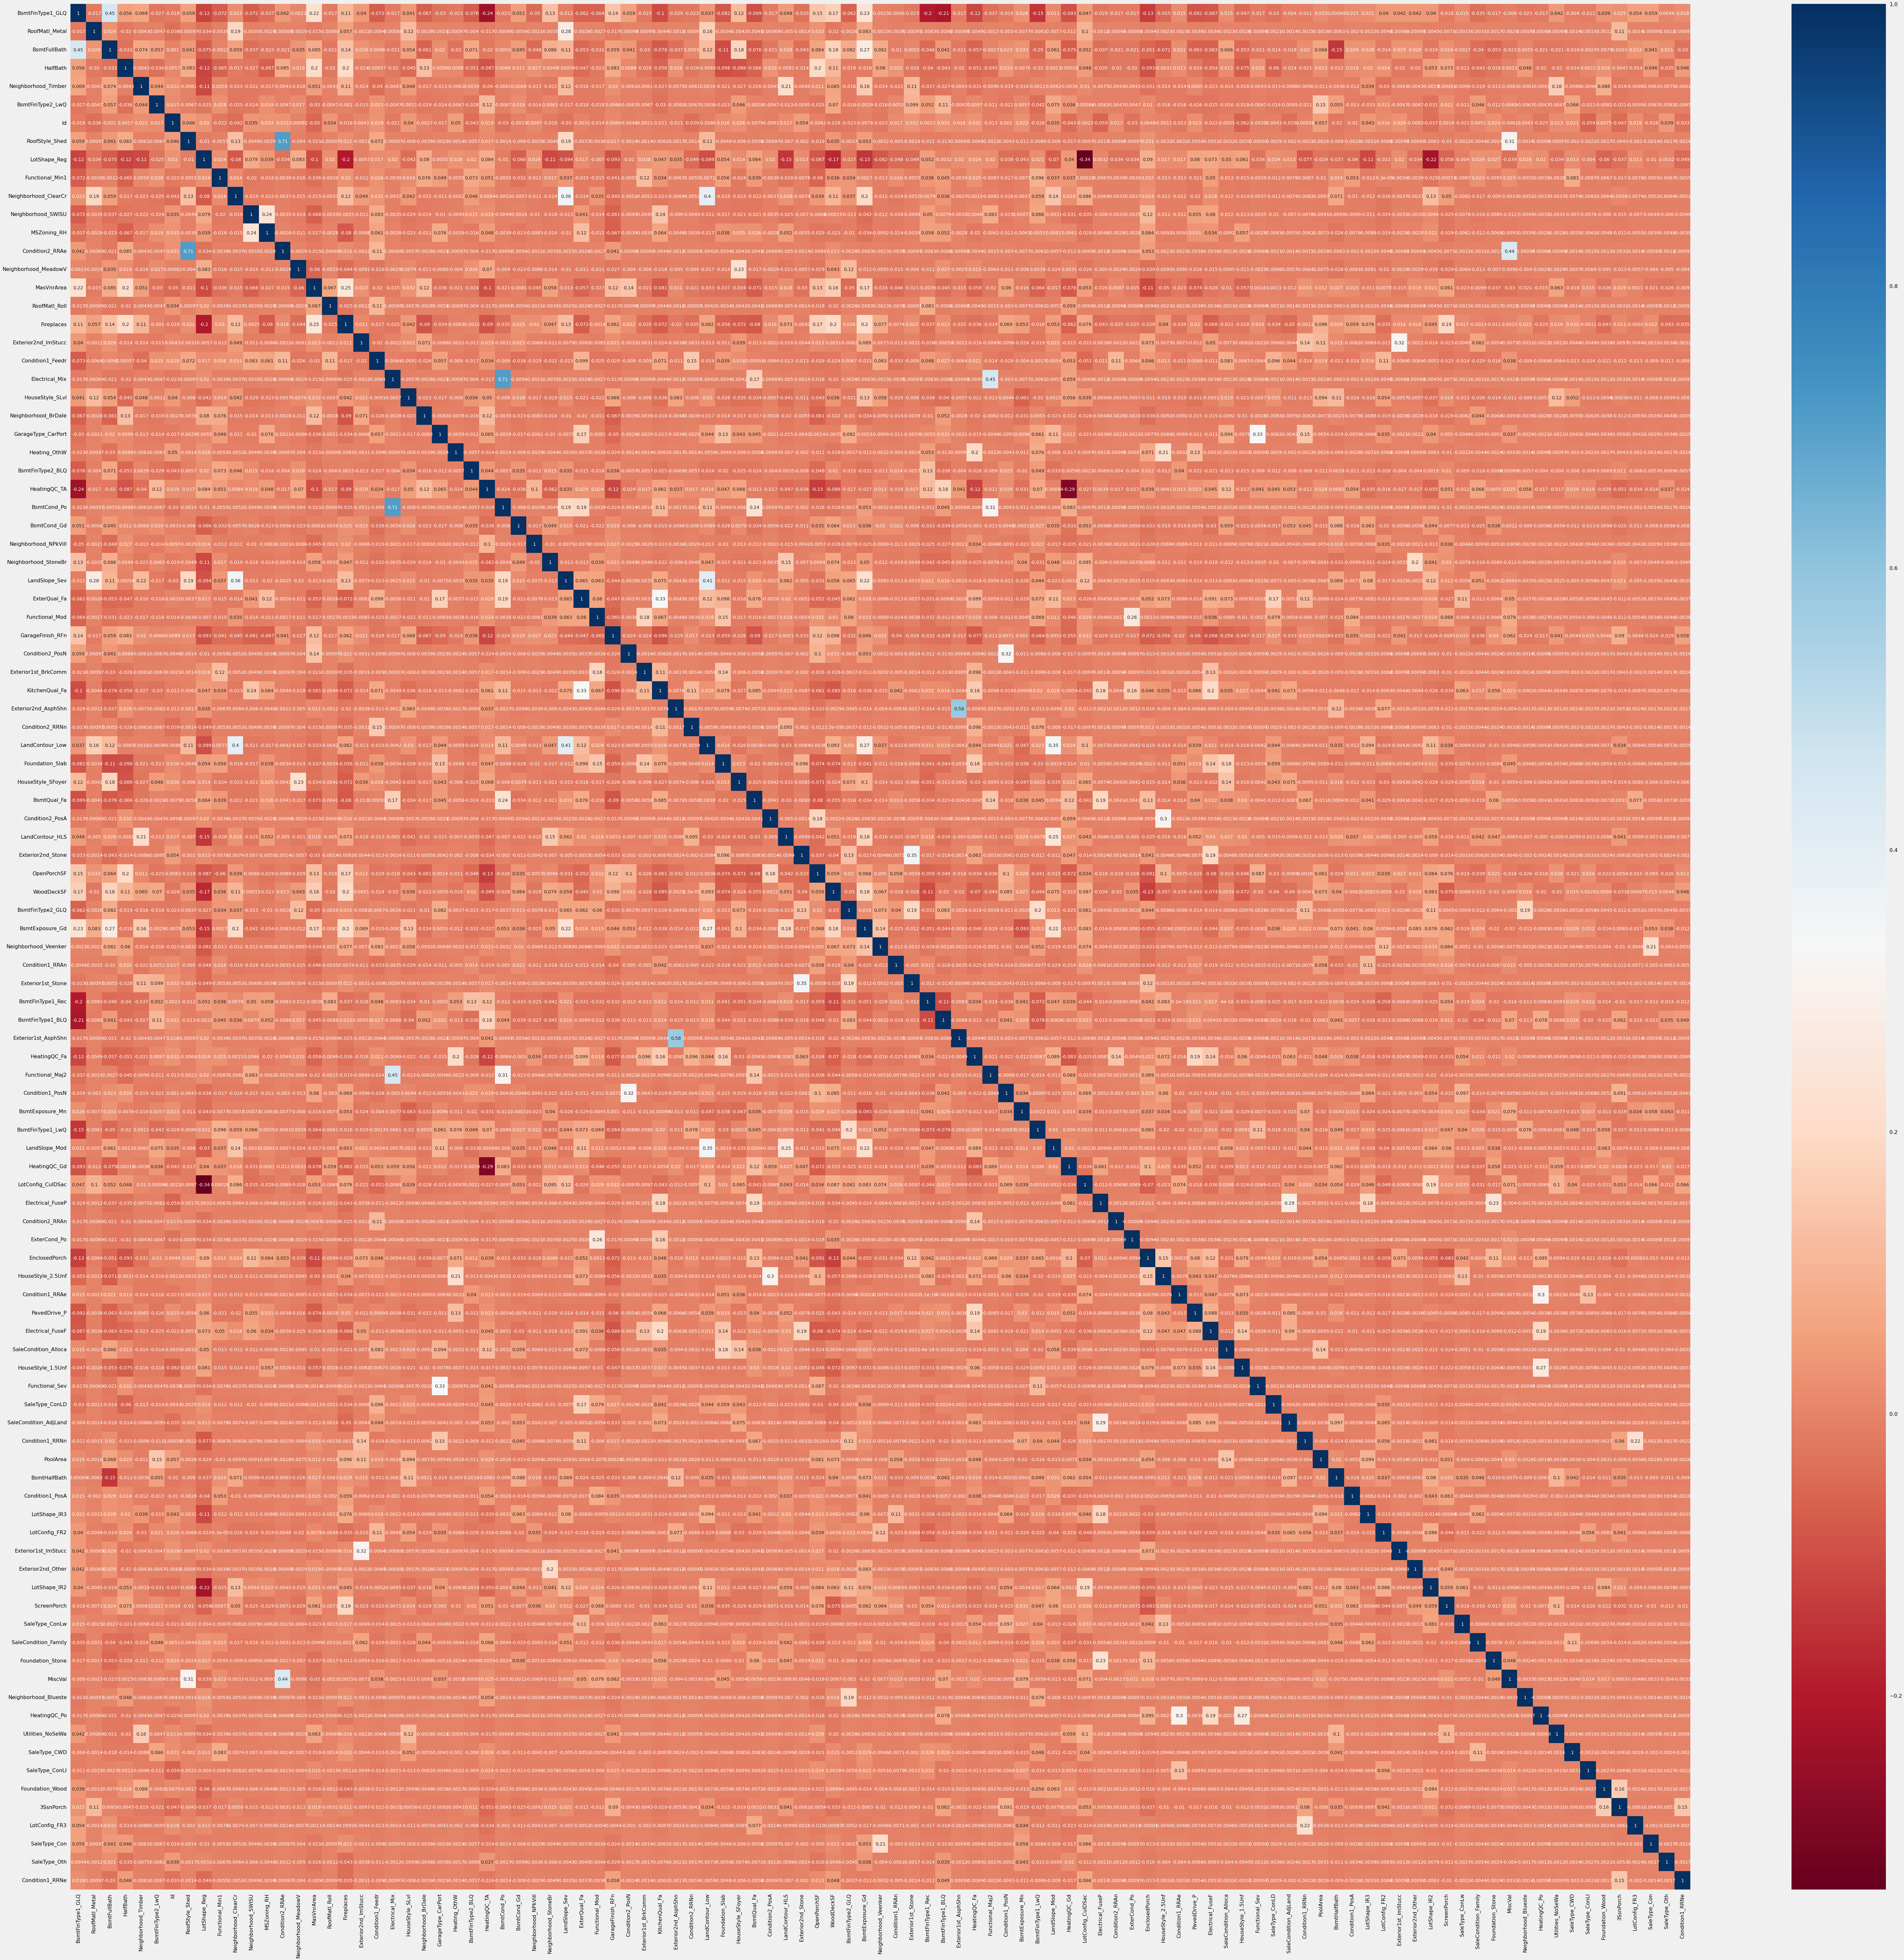

In [49]:
plt.figure(figsize = (100,100))
sns.heatmap(df_vif.corr(), annot = True, cmap="RdBu")
plt.show()

In [60]:
y=df_vif['SalePrice']
df_vif=df_vif.drop(['SalePrice'],axis=1)
df_vif.head()
# df_vif['SalePrice']

BsmtFinType1_GLQ  RoofMatl_Metal  BsmtFullBath  HalfBath  \
0                 1               0             1         1   
1                 0               0             0         0   
2                 1               0             1         1   
3                 0               0             1         0   
4                 1               0             1         1   

   Neighborhood_Timber  BsmtFinType2_LwQ  Id  RoofStyle_Shed  LotShape_Reg  \
0                    0                 0   1               0             1   
1                    0                 0   2               0             1   
2                    0                 0   3               0             0   
3                    0                 0   4               0             0   
4                    0                 0   5               0             0   

   Functional_Min1  ...  HeatingQC_Po  Utilities_NoSeWa  SaleType_CWD  \
0                0  ...             0                 0             0   
1                0  ...             0                 0             0   
2                0  ...             0                 0             0   
3                0  ...             0                 0             0   
4                0  ...             0                 0             0   

   SaleType_ConLI  Foundation_Wood  3SsnPorch  LotConfig_FR3  SaleType_Con  \
0               0                0          0              0             0   
1               0                0          0              0             0   
2               0                0          0              0             0   
3               0                0          0              0             0   
4               0                0          0              0             0   

   SaleType_Oth  Condition1_RRNe  
0             0                0  
1             0                0  
2             0                0  
3             0                0  
4             0                0  

[5 rows x 103 columns]

In [62]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_test_split(df_vif, y, test_size=0.33, random_state=42)

In [63]:
#Checking the data split
df_train_vif.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 376 to 979
Columns: 103 entries, BsmtFinType1_GLQ to Condition1_RRNe
dtypes: float64(1), int64(12), uint8(90)
memory usage: 232.7 KB


In [52]:
df_train_vif.dtypes

BsmtFinType1_GLQ           uint8
RoofMatl_Metal             uint8
BsmtFullBath               int64
HalfBath                   int64
Neighborhood_Timber        uint8
BsmtFinType2_LwQ           uint8
Id                         int64
RoofStyle_Shed             uint8
LotShape_Reg               uint8
Functional_Min1            uint8
Neighborhood_ClearCr       uint8
Neighborhood_SWISU         uint8
MSZoning_RH                uint8
Condition2_RRAe            uint8
Neighborhood_MeadowV       uint8
MasVnrArea               float64
RoofMatl_Roll              uint8
Fireplaces                 int64
Exterior2nd_ImStucc        uint8
Condition1_Feedr           uint8
Electrical_Mix             uint8
HouseStyle_SLvl            uint8
Neighborhood_BrDale        uint8
GarageType_CarPort         uint8
Heating_OthW               uint8
BsmtFinType2_BLQ           uint8
HeatingQC_TA               uint8
BsmtCond_Po                uint8
BsmtCond_Gd                uint8
Neighborhood_NPkVill       uint8
Neighborho

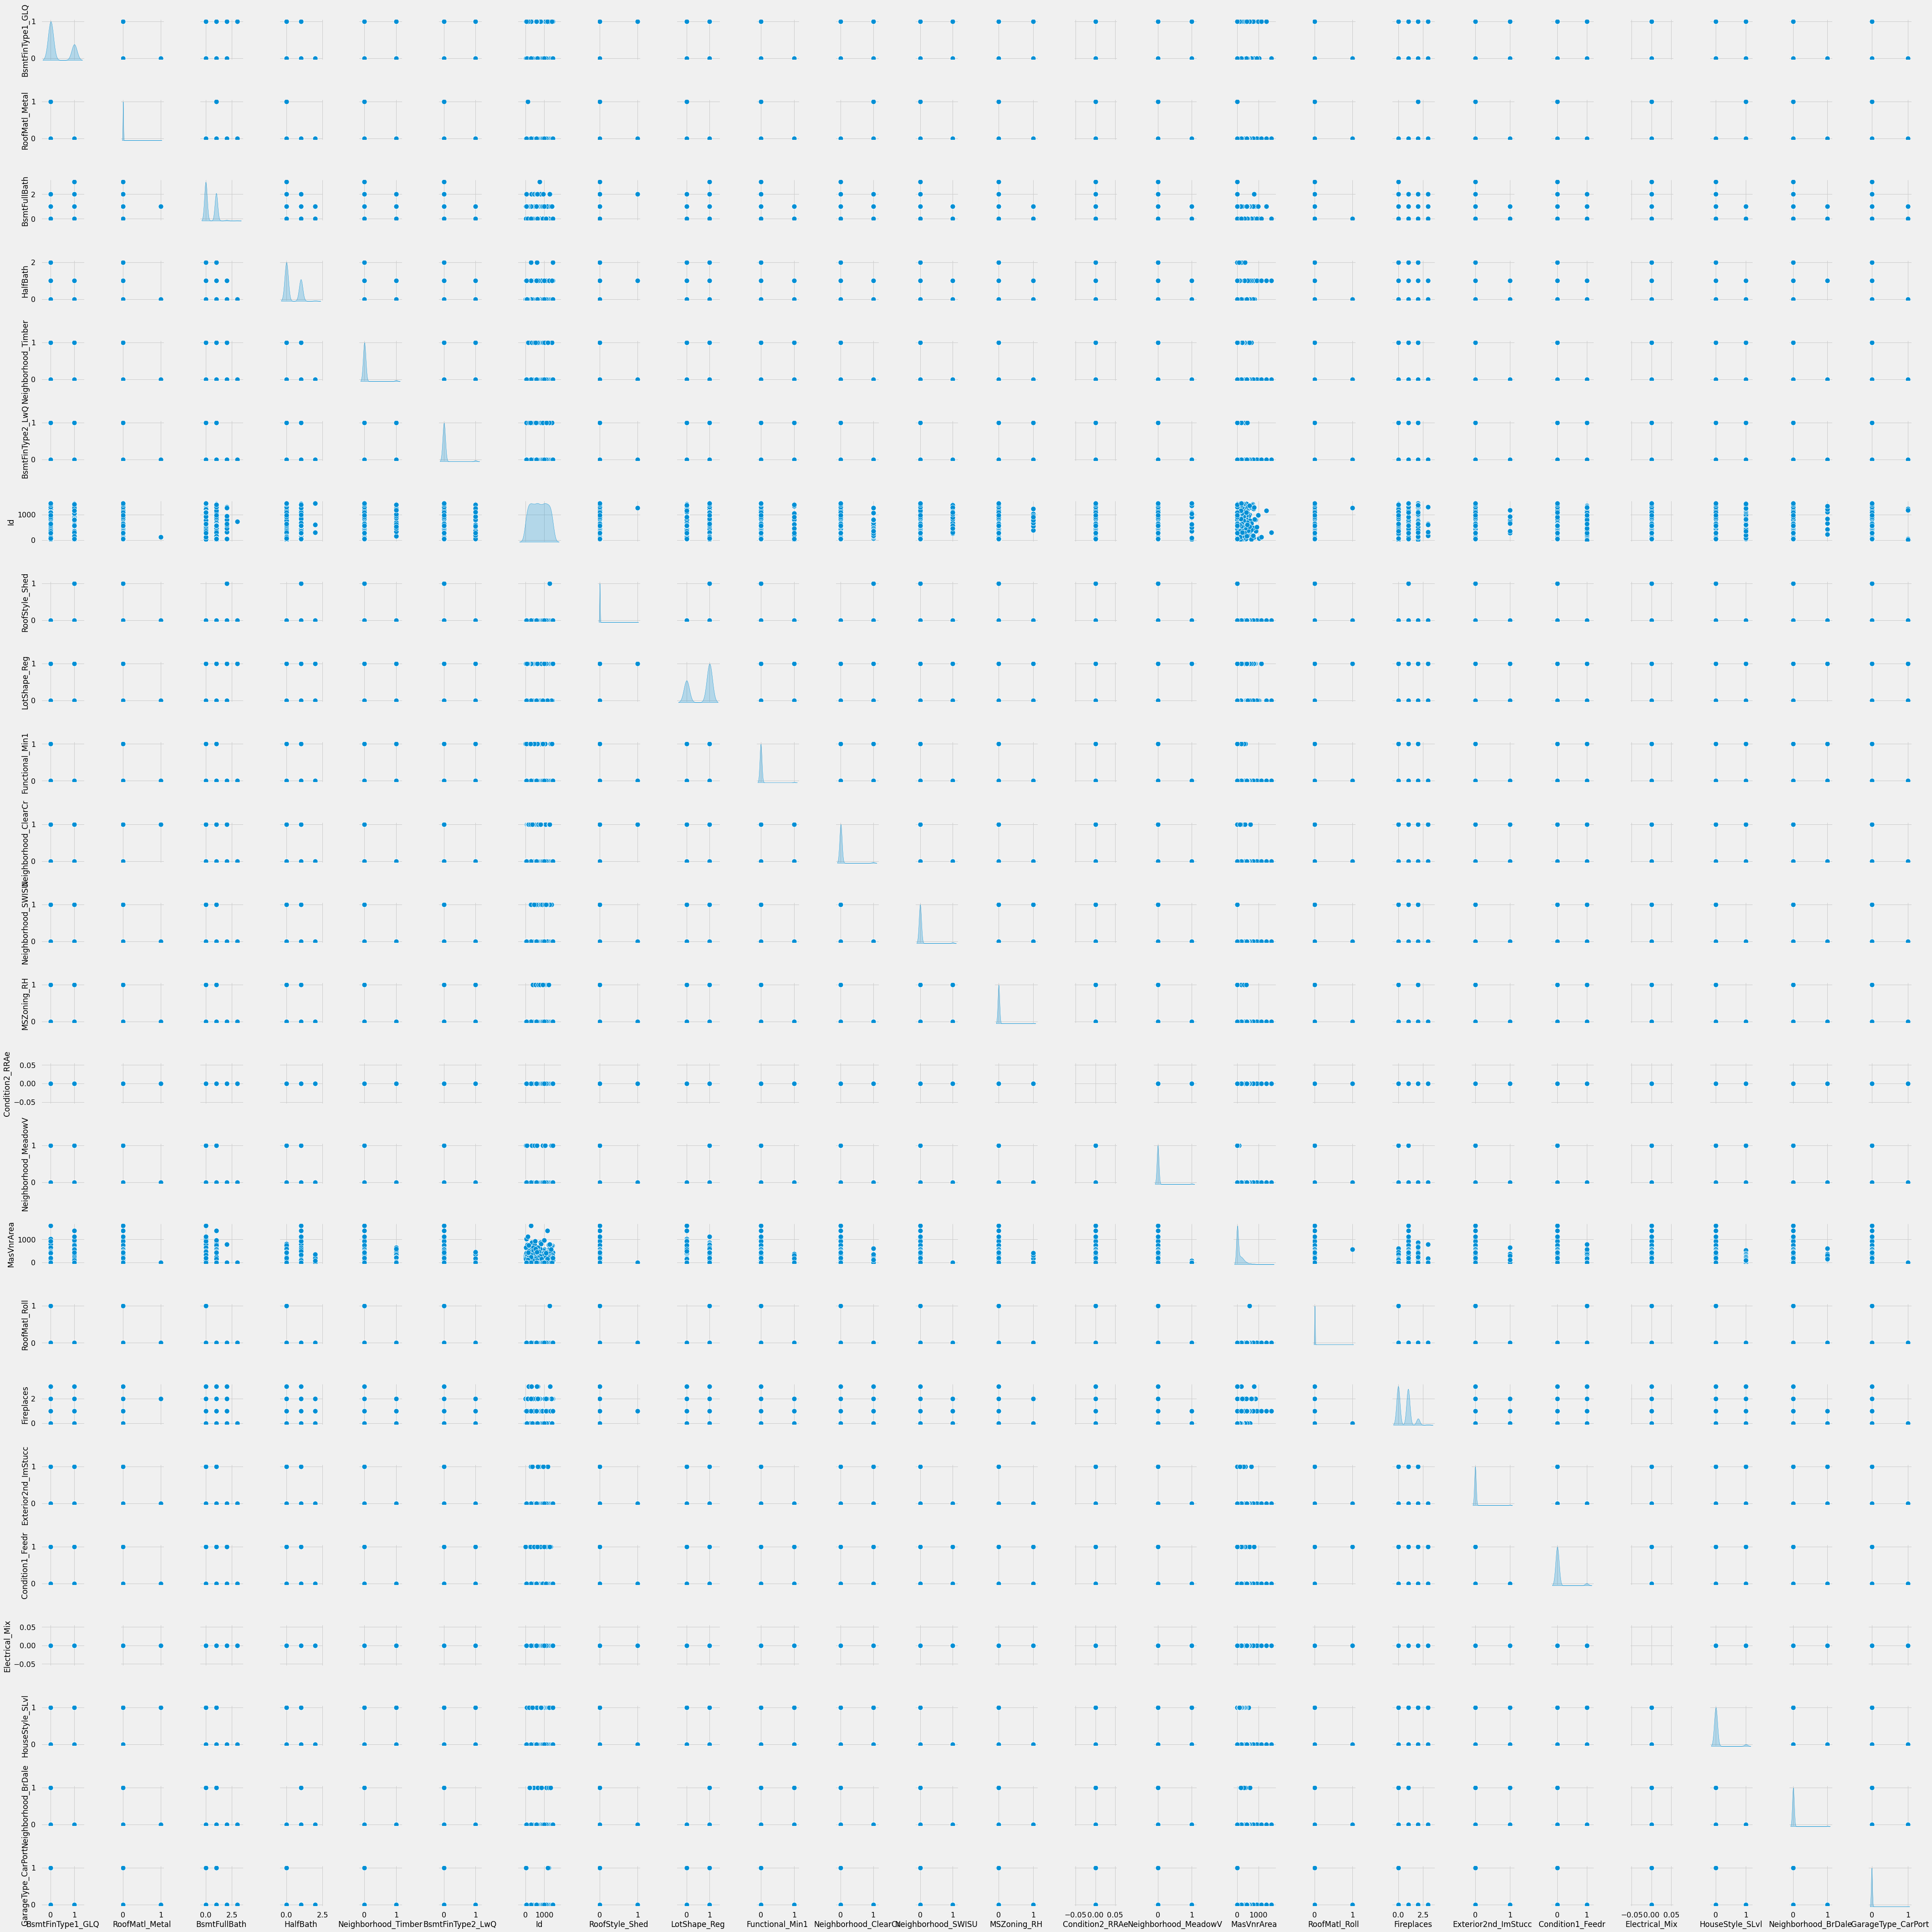

In [53]:
# Exploring the numerical columns of dataset

df_num=df_train_vif[['BsmtFinType1_GLQ','RoofMatl_Metal','BsmtFullBath','HalfBath','Neighborhood_Timber','BsmtFinType2_LwQ','Id','RoofStyle_Shed',
               'LotShape_Reg','Functional_Min1','Neighborhood_ClearCr','Neighborhood_SWISU','MSZoning_RH','Condition2_RRAe','Neighborhood_MeadowV',
               'MasVnrArea','RoofMatl_Roll','Fireplaces','Exterior2nd_ImStucc','Condition1_Feedr','Electrical_Mix','HouseStyle_SLvl','Neighborhood_BrDale',
               'GarageType_CarPort']]

sns.pairplot(df_num, diag_kind='kde')
plt.show()

In [65]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_vif, y_train_vif)

In [66]:
y_pred_vif=reg.predict(X_test_vif)

In [68]:
from sklearn.metrics import r2_score
r2_score(y_pred_vif,y_test_vif)

0.42211668652917655

In [69]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=50, step=1)
selector = selector.fit(df_vif, y)

In [70]:
selector.support_

array([ True, False,  True,  True,  True,  True, False, False,  True,
        True, False, False, False, False,  True,  True, False,  True,
       False,  True, False,  True,  True,  True, False,  True,  True,
       False,  True, False,  True, False,  True, False,  True, False,
       False,  True, False, False, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True, False,  True, False,
        True,  True, False,  True, False, False,  True,  True, False,
        True,  True, False, False, False,  True, False, False,  True,
        True,  True,  True, False, False, False, False,  True,  True,
       False,  True,  True, False, False,  True,  True, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False])

In [71]:
selector.ranking_

array([ 1, 37,  1,  1,  1,  1, 28, 18,  1,  1,  7, 12,  6, 34,  1,  1, 42,
        1, 21,  1, 39,  1,  1,  1, 54,  1,  1, 19,  1, 35,  1, 43,  1,  4,
        1, 53, 20,  1, 14, 17,  9,  1,  1,  1, 48,  1, 50,  1,  1,  1,  1,
        5,  1, 23,  1,  1, 32,  1,  3, 36,  1,  1, 47,  1,  1, 13, 33, 30,
        1, 49, 27,  1,  1,  1,  1, 29,  2, 16, 11,  1,  1,  8,  1,  1, 46,
       45,  1,  1, 41,  1, 24, 26, 52, 31, 44, 51, 38, 40,  1, 10, 22, 15,
       25])